In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Центральная предельная теорема своими руками

Зададим случайную величину с распределением арксинуса, сгенерируем выборку из 1000 значений и зададим теоретическую плотность распределения.

In [2]:
np.seterr(divide='ignore', invalid='ignore')

loc_ = 1.0
scale_ = 1.0
arcsine_rv = sts.arcsine(loc=loc_, scale=scale_)

sample = arcsine_rv.rvs(size=1000)

x = np.linspace(loc_, loc_ + scale_, 50)
pdf = arcsine_rv.pdf(x)

Построим гистограмму выборки и теоретическую плотность распределения случайной величины.

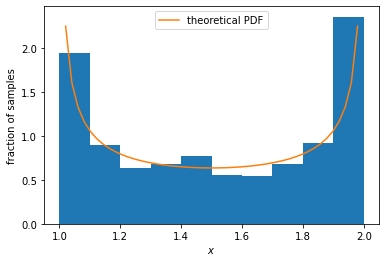

In [4]:
plt.hist(sample, density=True)
plt.plot(x, pdf, label='theoretical PDF')

plt.legend()
plt.ylabel('fraction of samples')
plt.xlabel('$x$');

При трёх значениях n (5, 10, 50) сгенерируем 1000 выборок объёма n и найдём их выборочные средние.

In [36]:
n_list = [5, 10, 50]
sample_matrix_list = []
sample_means_list = []
for n in n_list:
    sample_matrix_list.append(sts.arcsine(loc=loc_, scale=scale_).rvs(size=1000*n).reshape((1000, n)))
    sample_means_list.append(sample_matrix_list[-1]@np.ones((n, 1))/n)

Построим гистограммы распределений выборочных средних для n равных (5, 10, 50).

Text(0.5, 0, '$x$')

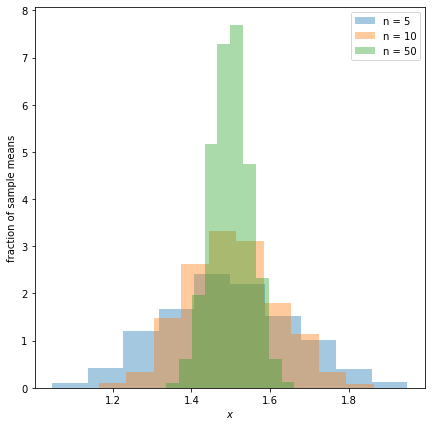

In [37]:
plt.figure(figsize=(7,7))
for i in range(3):
    plt.hist(sample_means_list[i], density=True, label=f'n = {n_list[i]}', alpha=0.4)
plt.legend()
plt.ylabel('fraction of sample means')
plt.xlabel('$x$')

# Параметры нормальных распределений
Найдём значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

Согласно Википедии, при параметрах ```loc_ = 0``` и ```scale_ = 1.0``` мат. ожидание случайной величины будет равно $1/2$, а дисперсия $1/8$.

А при произвольных параметрах  ```loc_``` и ```scale_``` мат. ожидание будет равно ```loc_+scale_/2```, а дисперсия ```(scale_**2)/8```. 

И согласно центральной предельной теореме, искомые параметры нормального распределения будут равны ```loc_+scale_/2``` и ```((scale_**2)/(8*n_list[i]))**(1/2)```.

Поверх каждой гистограммы построим плотность соответствующего нормального распределения.

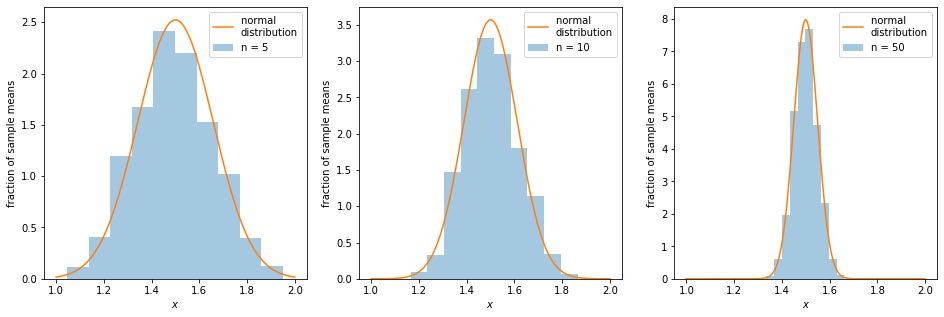

In [38]:
plt.figure(figsize=(16,5))
# i = 2
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(sample_means_list[i], density=True, label=f'n = {n_list[i]}', alpha=0.4)
    x = np.linspace(loc_, loc_ + scale_, 200)
    pdf = sts.norm(loc=loc_+scale_/2, scale=((scale_**2)/(8*n_list[i]))**(1/2)).pdf(x)
    plt.plot(x, pdf, label='normal \ndistribution')
    plt.legend()
    plt.ylabel('fraction of sample means')
    plt.xlabel('$x$')

# Вывод
Гистограммы распределений выборочных средних становятся уже и выше с ростом n,а точность апроксимации распределения выборочных средних нормальным увеличивается.